

# Project: Investigate a Dataset (Movie Insights)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We'll be going through IMDB sourced data which was available on Kaggle. It has lots of informaion. However we'll be focusing on the following questions only :

1 - Is there extremely high correlation between budget and revenue ? Do high budget movies guarantee higher revenue 
<br>2 - Which year had the most number of movies released
<br>3 - What's the average runtime of a movie

In [153]:
# importing all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [154]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
original_data = pd.read_csv('tmdb-movies.csv')
original_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We have 10866 rows and 21 columns. Below we'll drop columns which are irrelevant for our questions.

In [155]:
work_data = original_data.copy() # create another df for working so that original data can be accessed when needed as well

In [156]:
#Instead of dropping lots of useless columns let's just copy useful columns in our data
work_data = work_data[['id','imdb_id','original_title','budget','revenue','director','runtime','release_year']]
#Release year coulumn could be dropped as well but I feel it might be useful later
work_data.head(5) # test dataset

,id,imdb_id,original_title,budget,revenue,director,runtime,release_year
0,135397,tt0369610,Jurassic World,150000000,1513528810,Colin Trevorrow,124,2015
1,76341,tt1392190,Mad Max: Fury Road,150000000,378436354,George Miller,120,2015
2,262500,tt2908446,Insurgent,110000000,295238201,Robert Schwentke,119,2015
3,140607,tt2488496,Star Wars: The Force Awakens,200000000,2068178225,J.J. Abrams,136,2015
4,168259,tt2820852,Furious 7,190000000,1506249360,James Wan,137,2015


In [157]:
work_data.describe() #basic description

,id,budget,revenue,runtime,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000
mean,66064.177434,1.462570e+07,3.982332e+07,102.070863,2001.322658
std,92130.136561,3.091321e+07,1.170035e+08,31.381405,12.812941
min,5.000000,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,10596.250000,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,20669.000000,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,75610.000000,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,417859.000000,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [158]:
work_data.drop_duplicates(inplace = True) # Drop duplicates if any
work_data.dropna(inplace = True) #drop all NAN values

In [159]:
work_data.query('budget <= 3000').count() # number of wrong data

id                5710
imdb_id           5710
original_title    5710
budget            5710
revenue           5710
director          5710
runtime           5710
release_year      5710
dtype: int64

### Data Cleaning
<br>Although we might have already started cleaning the data in a way by dropping columns, below is where the actual cleaning begins

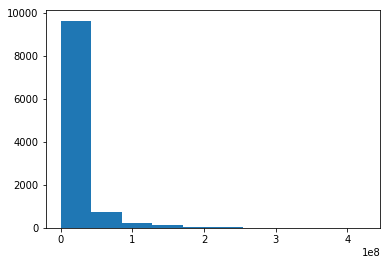

In [160]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
plt.hist(work_data['budget']);

We can clearly see that something is wrong with this budget data as google says the lowest budget movie of all time is 3000$ so we would be factoring values only greater than that.


In [161]:
work_data = work_data.query('budget >= 3000')
work_data.count()
work_data.budget.describe() # This seems like appropriate data

count    5.105000e+03
mean     3.112248e+07
std      3.899587e+07
min      3.500000e+03
25%      6.000000e+06
50%      1.800000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

We can make 2 observations here, the data size has been reduced significantly and 4 director fields are missing.
<br> We also have multiple directors for a single film, but we aren't that much interested so we'll leave that

In [162]:
work_data = work_data.query('revenue > 0') # minimum revenue earned can't be 0 either
work_data.count()

id                3831
imdb_id           3831
original_title    3831
budget            3831
revenue           3831
director          3831
runtime           3831
release_year      3831
dtype: int64

In [163]:
work_data.revenue.value_counts(ascending = True)
work_data.revenue.describe() # This seems approriate, although min revenue can't be 2 but who knows about 1960 :)
# We will leave it as it as it wouldn't make an extremely drastic difference to our answer

count    3.831000e+03
mean     1.082978e+08
std      1.768824e+08
min      2.000000e+00
25%      1.400000e+07
50%      4.555453e+07
75%      1.249074e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [164]:
work_data.describe()

,id,budget,revenue,runtime,release_year
count,3831.000000,3.831000e+03,3.831000e+03,3831.000000,3831.000000
mean,39877.634821,3.742596e+07,1.082978e+08,109.248499,2001.271731
std,67280.495285,4.223681e+07,1.768824e+08,19.859279,11.284641
min,5.000000,6.000000e+03,2.000000e+00,26.000000,1960.000000
25%,6053.000000,1.000000e+07,1.400000e+07,96.000000,1995.000000
50%,11298.000000,2.400000e+07,4.555453e+07,106.000000,2004.000000
75%,38541.500000,5.000000e+07,1.249074e+08,119.000000,2010.000000
max,417859.000000,4.250000e+08,2.781506e+09,338.000000,2015.000000


Working on this data would give us better conclusions than before 

<a id='eda'></a>
## Exploratory Data Analysis

Now let's work on answering our questions

### Do high budget movies have higher revenue

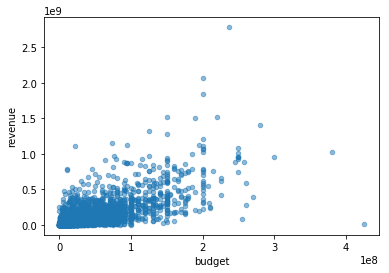

In [165]:
# We need to find if there is a correlation
work_data.plot(x= 'budget', y = 'revenue', kind = 'scatter', alpha =0.5);

In [166]:
work_data['revenue'].corr(work_data['budget'])

0.6878311956098067

Graph has been plotted it in a exponential form but it is clear that although there is some realtion we do have instances where it isn't dependant on one anothere, but there is defnitely some relation between the 2 for movies with a budget of less than 200 million.

There is decent correlation but no guarantee that higher budgets yield higher revenues.

### Which year had the most number of movies released

196

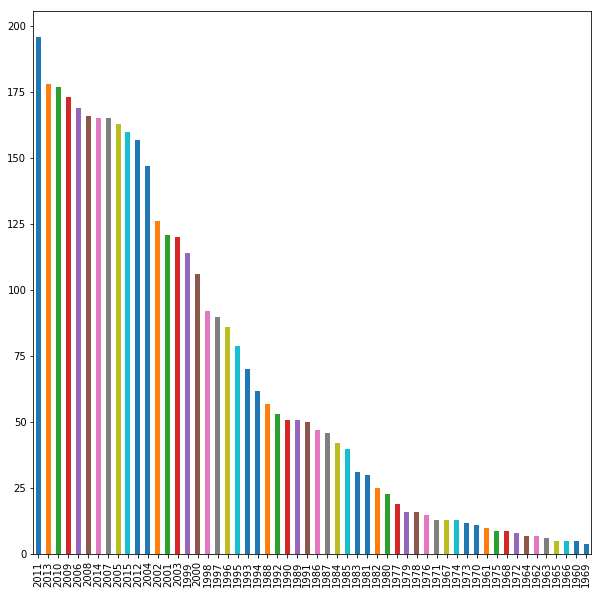

In [167]:
plt.figure(figsize = (10,10))
work_data.release_year.value_counts().plot(kind = 'bar')
work_data.release_year.value_counts().max()


Clearly 2011 had the most number of movies released with 196 movies released. The above graph also helps us understand the trend in the no of movies released.

### What's the average runtime of a movie

In [168]:
work_data.runtime.mean()

109.24849908640041

Average run time for a movie is 109 mins.

<a id='conclusions'></a>
## Conclusions

Thus we have answere all our questions.

There is some correlation, however there isn't an guarantee that high budget movies will yield higher revenue.
<br>Year which had most number of movies released 2011.
<br>Average run time of movies is 109 mins according to the sample data that we have used.